In [2]:
import sys
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

# Linear Regression - Train on One Country, Test on Another

In [3]:
path = os.getcwd() + "/clean-data/processed_country_temperature_data.csv"
df = pd.read_csv(path)
df.head(50)

,dt,AverageTemperature,Country,dt_formatted,month_offset
0,1743-11-01,5.645,Montenegro,1743-11-01,1
1,1851-01-01,25.364,Costa Rica,1851-01-01,1
2,1903-01-01,25.793,Guam,1903-01-01,1
3,1743-11-01,4.384,Åland,1743-11-01,1
4,1743-11-01,5.928,Bulgaria,1743-11-01,1
5,1819-01-01,7.062,Iraq,1819-01-01,1
6,1819-01-01,-5.145,Uzbekistan,1819-01-01,1
7,1819-01-01,-1.575,Turkmenistan,1819-01-01,1
8,1743-11-01,6.507,Denmark (Europe),1743-11-01,1
9,1819-05-01,31.917,Niger,1819-05-01,1


In [4]:
def linear_coefs(X, Y):
  """
  Args:
    X: N x d matrix of input features
    Y: N x 1 matrix (column vector) of output response

  Returns:
    Beta: d x 1 matrix of linear coefficients
  """
  beta = tf.linalg.solve(tf.matmul(tf.transpose(X), X), tf.matmul(tf.transpose(X), Y))  # Return closed form solution (use tf.transpose and tf.mathmul instead of np version)
  return beta

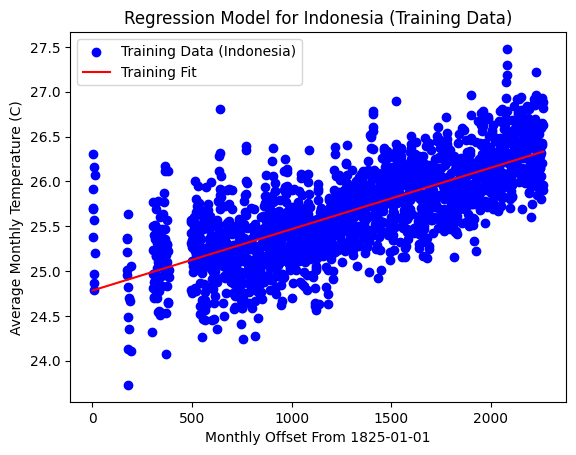

Mean Absolute Error (in Celcius): 0.27217671800484483
Coefficient of Determination (r^2): 0.5434180663305574
Mean Absolute Error (in Celcius): 0.46900253634982647
Coefficient of Determination (r^2): 0.27841634183205477


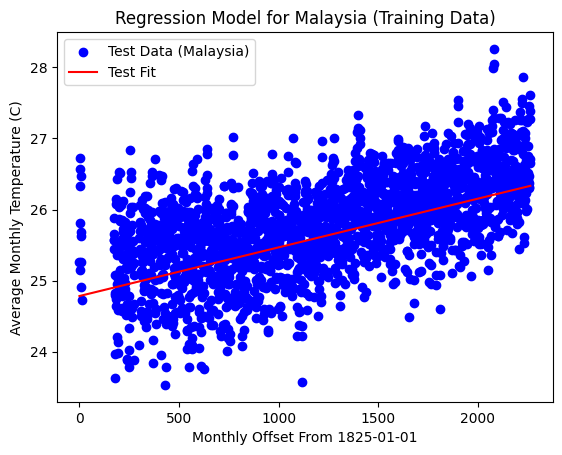

In [17]:
train_country = "Indonesia" # Country to train the model
test_country = "Malaysia" # Country to test the model

# Training and training plot
train_data = df[df['Country'] == train_country]
test_data = df[df['Country'] == test_country]

if train_data.empty or test_data.empty:
    print(f"No data available for training ({train_country}) or testing ({test_country}).")
else:
    # Convert to column vectors
    X_train = train_data['month_offset'].values.reshape(-1, 1)  
    Y_train = train_data['AverageTemperature'].values.reshape(-1, 1)  
    X_test = test_data['month_offset'].values.reshape(-1, 1)  
    Y_test = test_data['AverageTemperature'].values.reshape(-1, 1)  

    # Generate linear coefficients on training data (with intercept)
    X_train_with_intercept = tf.concat([X_train, tf.ones([tf.shape(X_train)[0], 1])], axis=1)# Append a dummy feature of ones that is N x 1 (increase dimensionality to 2)
    beta_train_linear = linear_coefs(X_train_with_intercept, Y_train) # Run linear regression on X (including intercept) and outputs Y
    Y_train_prediction = tf.matmul(X_train_with_intercept, beta_train_linear)  # Multiply original inputs X by found features (dot product of input X with parameters produces output Y - beta[0] is slope and beta[1] is intercept)

    # Use calculated linear coefficients on training data
    X_test_with_intercept = tf.concat([X_test, tf.ones([tf.shape(X_test)[0], 1])], axis=1)# Append a dummy feature of ones that is N x 1 (increase dimensionality to 2)
    Y_test_prediction = tf.matmul(X_test_with_intercept, beta_train_linear)

    # Plot for training data
    plt.scatter(X_train, Y_train, label=f"Training Data ({train_country})", color="blue")
    plt.plot(X_train, Y_train_prediction, label="Training Fit", color="red")

    plt.ylabel("Average Monthly Temperature (C)")
    plt.xlabel(f"Monthly Offset From {train_data.sort_values(by='dt', ascending=True)['dt'].iloc[0]}")
    plt.title(f"Regression Model for {train_country} (Training Data)")
    plt.legend()
    plt.show()

    # Evaluate accuracy of predictions on the training data
    mae_train = mean_absolute_error(Y_train, Y_train_prediction.numpy())
    print(f"Mean Absolute Error (in Celcius): {mae_train}")

    # Evaluate coefficient of determination
    r2_train = r2_score(Y_train, Y_train_prediction.numpy())
    print(f"Coefficient of Determination (r^2): {r2_train}")

# Testing plot
    # Evaluate accuracy of predictions on the test data
    mae_test = mean_absolute_error(Y_test, Y_test_prediction.numpy())
    print(f"Mean Absolute Error (in Celcius): {mae_test}")

    # Evaluate coefficient of determination
    r2_test = r2_score(Y_test, Y_test_prediction.numpy())
    print(f"Coefficient of Determination (r^2): {r2_test}")
    
    # Plot for test data
    plt.scatter(X_test, Y_test, label=f"Test Data ({test_country})", color="blue")
    plt.plot(X_test, Y_test_prediction, label="Test Fit", color="red")

    plt.ylabel("Average Monthly Temperature (C)")
    plt.xlabel(f"Monthly Offset From {test_data.sort_values(by='dt', ascending=True)['dt'].iloc[0]}")
    plt.title(f"Regression Model for {test_country} (Training Data)")
    plt.legend()
    plt.show()